### Diabetes Dataset Analysis


## Introduction
The project demonstrates how to use Scikit-Learn for data analysis and modeling on the sample dataset. The project employed a dataset for the prevalence of diabetes in the United States for the analysis and modeling. The project detailed the necessary steps in conducting the analysis and modeling. The analysis consisted the exploratory data analysis and some predictions after the modeling.
The project explored the dataset, performed preprocessing, and built predictive models using classification and regression techniques.

### Objectives:
1. Load and explore the dataset.  
2. Perform data preprocessing and feature selection.    
3. Train and evaluate **regression** models to predict `BMI.  
4. Compare model performance using Scikit-Learn.  

In [1]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


## Import necessary libraries

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### Load the dataset

In [3]:
df = pd.read_csv('./diabetes_dataset.csv')

In [4]:
df

,Age,Gender,Ethnicity,Income,BMI,Blood_Pressure,Cholesterol,Exercise_Hours_Per_Week,Alcohol_Consumption_Per_Week,Smoking_Status,...,Insulin_Resistance,Heart_Disease_History,Physical_Activity_Level,Fast_Food_Intake_Per_Week,Processed_Food_Intake_Per_Week,Daily_Caloric_Intake,Sleep_Hours_Per_Night,Stress_Level,Medication_Use,Diabetes_Diagnosis
0,69,Female,Other,39557,38.2,94.6,252.9,3.3,4,Never,...,5.1,0,Low,3,4,3641,8.7,Low,0,1
1,32,Male,Black,90663,33.6,167.0,282.6,4.6,7,Never,...,1.7,1,Moderate,8,0,3361,8.0,Low,1,0
2,89,Male,White,116180,39.4,100.6,106.8,6.1,5,Former,...,4.9,1,Low,9,8,2397,8.8,High,1,0
3,78,Male,Other,73059,40.6,111.1,169.7,7.4,9,Never,...,9.8,0,High,7,5,2491,6.4,Low,1,1
4,38,Female,White,35389,29.7,143.3,296.5,2.6,6,Never,...,1.7,1,Moderate,0,7,1325,6.6,High,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,21,Male,Black,99216,20.8,100.9,263.3,9.9,6,Current,...,6.4,1,Moderate,1,5,3812,4.3,Moderate,0,1
49996,35,Female,Asian,68404,42.6,138.0,220.8,2.6,14,Never,...,5.2,0,High,3,9,3935,9.3,Moderate,0,1
49997,46,Male,White,21337,44.9,179.2,211.1,7.7,9,Current,...,9.5,1,Moderate,5,2,2579,7.4,Moderate,1,0
49998,56,Male,Other,93760,24.6,179.4,292.1,7.9,6,Never,...,7.7,0,Low,6,0,1951,6.2,High,0,0


### Processing Data
Data processing involves identifying the shape of the data for the project. It also includes identifying the columns in the dataset to know the target and feature variables for the project. This involves dropping rows with missing values and filling missing target values with the mean.
In this project, some nonnumeric data fields in the dataset were removed to prevent unnecessary noise that can affect the performance of the model.

In [5]:
df.isna().sum()

Age                               0
Gender                            0
Ethnicity                         0
Income                            0
BMI                               0
Blood_Pressure                    0
Cholesterol                       0
Exercise_Hours_Per_Week           0
Alcohol_Consumption_Per_Week      0
Smoking_Status                    0
Family_History_Diabetes           0
Glucose_Level                     0
HbA1c                             0
Insulin_Resistance                0
Heart_Disease_History             0
Physical_Activity_Level           0
Fast_Food_Intake_Per_Week         0
Processed_Food_Intake_Per_Week    0
Daily_Caloric_Intake              0
Sleep_Hours_Per_Night             0
Stress_Level                      0
Medication_Use                    0
Diabetes_Diagnosis                0
dtype: int64

In [6]:
# Removing non-numeric data field in the dataset to prevent unnecessary noise that can affect the performance of the model
df = df.drop(columns=['Gender', 'Ethnicity', 'Smoking_Status', 'Physical_Activity_Level', 'Stress_Level'])

In [7]:
df

,Age,Income,BMI,Blood_Pressure,Cholesterol,Exercise_Hours_Per_Week,Alcohol_Consumption_Per_Week,Family_History_Diabetes,Glucose_Level,HbA1c,Insulin_Resistance,Heart_Disease_History,Fast_Food_Intake_Per_Week,Processed_Food_Intake_Per_Week,Daily_Caloric_Intake,Sleep_Hours_Per_Night,Medication_Use,Diabetes_Diagnosis
0,69,39557,38.2,94.6,252.9,3.3,4,0,101.0,6.1,5.1,0,3,4,3641,8.7,0,1
1,32,90663,33.6,167.0,282.6,4.6,7,0,178.1,4.4,1.7,1,8,0,3361,8.0,1,0
2,89,116180,39.4,100.6,106.8,6.1,5,1,184.4,8.3,4.9,1,9,8,2397,8.8,1,0
3,78,73059,40.6,111.1,169.7,7.4,9,0,126.7,7.4,9.8,0,7,5,2491,6.4,1,1
4,38,35389,29.7,143.3,296.5,2.6,6,1,199.9,8.5,1.7,1,0,7,1325,6.6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,21,99216,20.8,100.9,263.3,9.9,6,0,143.6,8.8,6.4,1,1,5,3812,4.3,0,1
49996,35,68404,42.6,138.0,220.8,2.6,14,0,75.2,4.6,5.2,0,3,9,3935,9.3,0,1
49997,46,21337,44.9,179.2,211.1,7.7,9,0,173.0,8.4,9.5,1,5,2,2579,7.4,1,0
49998,56,93760,24.6,179.4,292.1,7.9,6,1,198.1,9.0,7.7,0,6,0,1951,6.2,0,0


In [8]:
df.columns

Index(['Age', 'Income', 'BMI', 'Blood_Pressure', 'Cholesterol',
       'Exercise_Hours_Per_Week', 'Alcohol_Consumption_Per_Week',
       'Family_History_Diabetes', 'Glucose_Level', 'HbA1c',
       'Insulin_Resistance', 'Heart_Disease_History',
       'Fast_Food_Intake_Per_Week', 'Processed_Food_Intake_Per_Week',
       'Daily_Caloric_Intake', 'Sleep_Hours_Per_Night', 'Medication_Use',
       'Diabetes_Diagnosis'],
      dtype='object')

In [9]:
# Step 2: Drop columns with any missing values
df_clean = df.dropna(axis=1)

In [10]:
df_clean

,Age,Income,BMI,Blood_Pressure,Cholesterol,Exercise_Hours_Per_Week,Alcohol_Consumption_Per_Week,Family_History_Diabetes,Glucose_Level,HbA1c,Insulin_Resistance,Heart_Disease_History,Fast_Food_Intake_Per_Week,Processed_Food_Intake_Per_Week,Daily_Caloric_Intake,Sleep_Hours_Per_Night,Medication_Use,Diabetes_Diagnosis
0,69,39557,38.2,94.6,252.9,3.3,4,0,101.0,6.1,5.1,0,3,4,3641,8.7,0,1
1,32,90663,33.6,167.0,282.6,4.6,7,0,178.1,4.4,1.7,1,8,0,3361,8.0,1,0
2,89,116180,39.4,100.6,106.8,6.1,5,1,184.4,8.3,4.9,1,9,8,2397,8.8,1,0
3,78,73059,40.6,111.1,169.7,7.4,9,0,126.7,7.4,9.8,0,7,5,2491,6.4,1,1
4,38,35389,29.7,143.3,296.5,2.6,6,1,199.9,8.5,1.7,1,0,7,1325,6.6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,21,99216,20.8,100.9,263.3,9.9,6,0,143.6,8.8,6.4,1,1,5,3812,4.3,0,1
49996,35,68404,42.6,138.0,220.8,2.6,14,0,75.2,4.6,5.2,0,3,9,3935,9.3,0,1
49997,46,21337,44.9,179.2,211.1,7.7,9,0,173.0,8.4,9.5,1,5,2,2579,7.4,1,0
49998,56,93760,24.6,179.4,292.1,7.9,6,1,198.1,9.0,7.7,0,6,0,1951,6.2,0,0


## Exploratory Data Analysis (EDA)


The complete [y-dat profilling report](https://ampo-tech.github.io/ydata/dataDiabetesProfileReport.html)

<Figure size 1200x800 with 0 Axes>

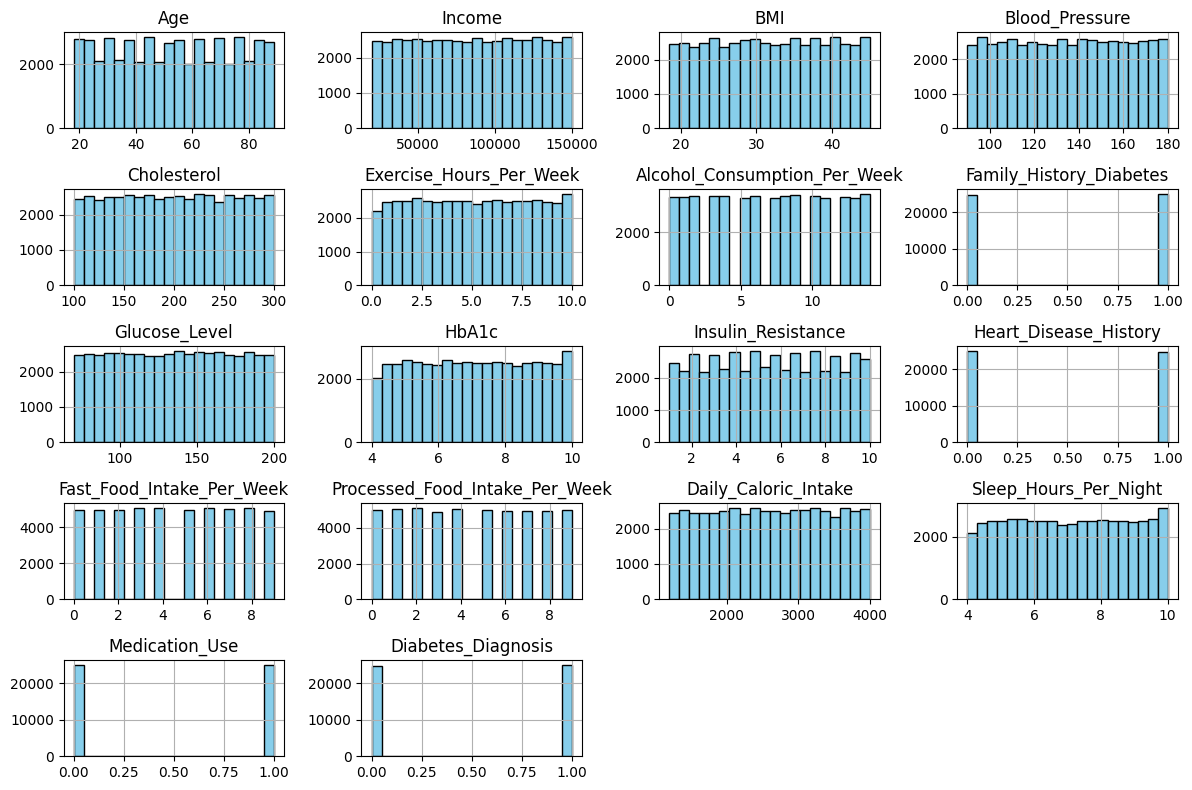

In [11]:
# Histograms for each numeric feature
plt.figure(figsize=(12, 8))
df_clean.hist(bins=20, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

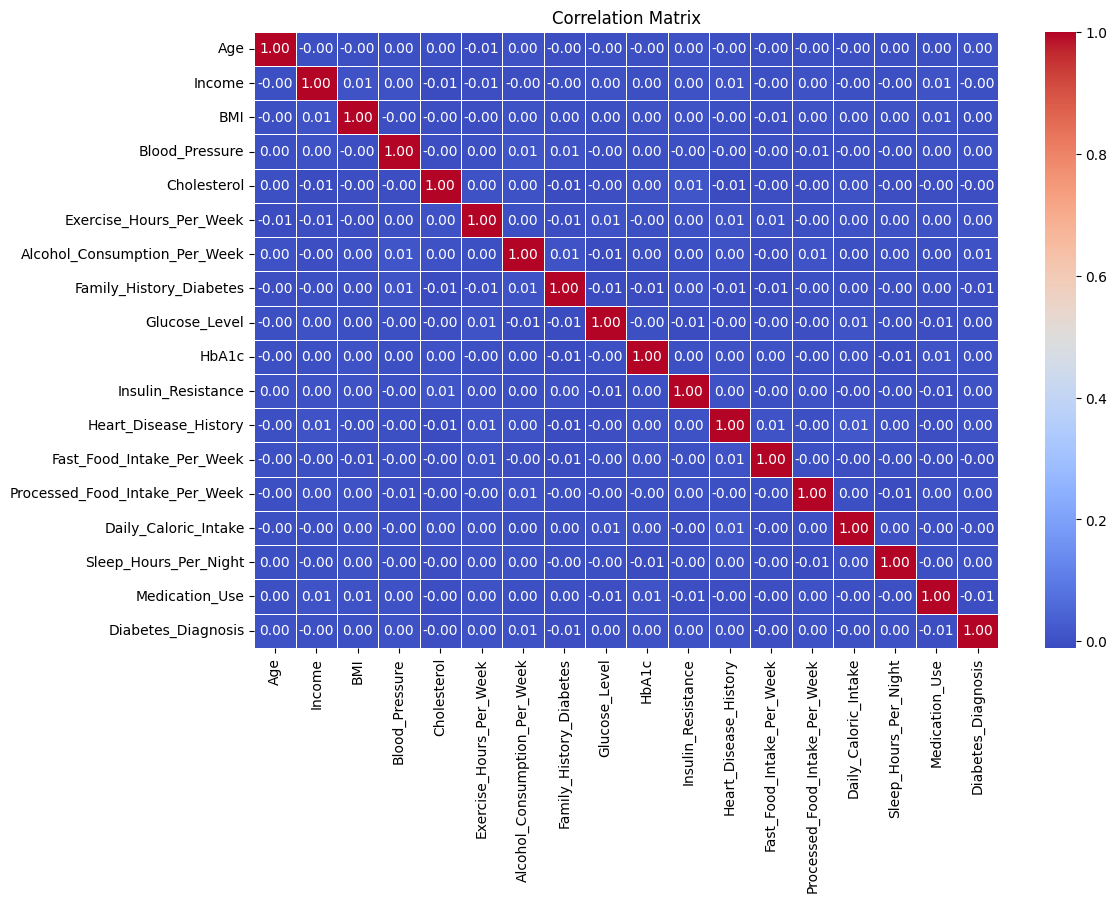

In [12]:
# Correlation Heatmap
# Correlation matrix between numeric features
plt.figure(figsize=(12, 8))
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

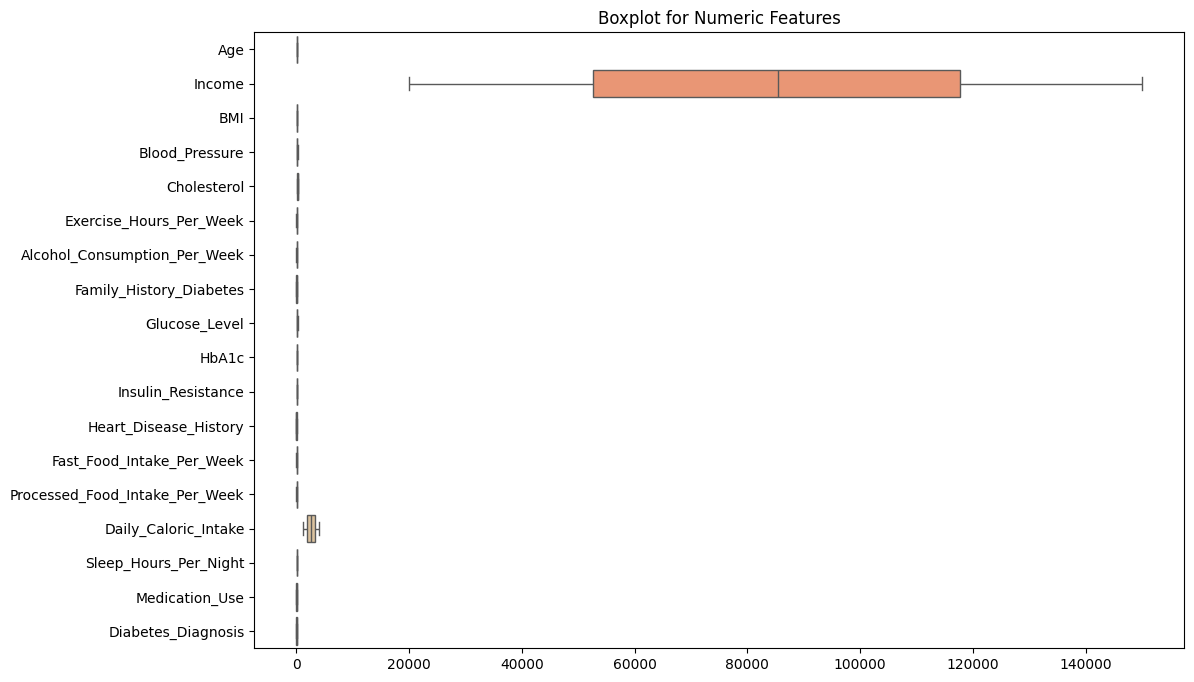

In [13]:
# Boxplot to visualize outliers (for numeric columns)
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_clean, orient="h", palette="Set2")
plt.title('Boxplot for Numeric Features')
plt.show()

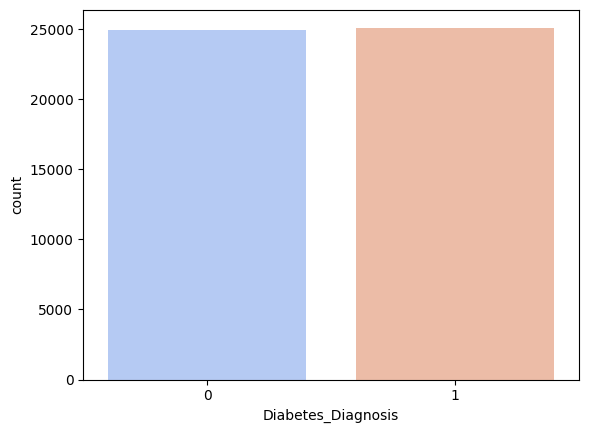

In [14]:
sns.countplot(data=df_clean, x='Diabetes_Diagnosis', hue='Diabetes_Diagnosis', palette='coolwarm', legend=False)
plt.show()

### Prep X and Y data

In [15]:
X = df.drop(['Diabetes_Diagnosis' ], axis =1)
y = df['Diabetes_Diagnosis']

In [16]:
# one-hot encoding 
X = pd.get_dummies(X, drop_first=True)
X.head()

,Age,Income,BMI,Blood_Pressure,Cholesterol,Exercise_Hours_Per_Week,Alcohol_Consumption_Per_Week,Family_History_Diabetes,Glucose_Level,HbA1c,Insulin_Resistance,Heart_Disease_History,Fast_Food_Intake_Per_Week,Processed_Food_Intake_Per_Week,Daily_Caloric_Intake,Sleep_Hours_Per_Night,Medication_Use
0,69,39557,38.2,94.6,252.9,3.3,4,0,101.0,6.1,5.1,0,3,4,3641,8.7,0
1,32,90663,33.6,167.0,282.6,4.6,7,0,178.1,4.4,1.7,1,8,0,3361,8.0,1
2,89,116180,39.4,100.6,106.8,6.1,5,1,184.4,8.3,4.9,1,9,8,2397,8.8,1
3,78,73059,40.6,111.1,169.7,7.4,9,0,126.7,7.4,9.8,0,7,5,2491,6.4,1
4,38,35389,29.7,143.3,296.5,2.6,6,1,199.9,8.5,1.7,1,0,7,1325,6.6,1


In [17]:
#  Predicting against all data  -basically just drawing a line as we have no test data
full_md1 =DecisionTreeClassifier()
full_md1.fit(X,y)
y_hat = full_md1.predict(X)
y_hat[:5], y[:5]

(array([1, 0, 0, 1, 0], dtype=int64),
 0    1
 1    0
 2    0
 3    1
 4    0
 Name: Diabetes_Diagnosis, dtype: int64)

In [18]:
y_hat

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [19]:
y

0        1
1        0
2        0
3        1
4        0
        ..
49995    1
49996    1
49997    0
49998    0
49999    0
Name: Diabetes_Diagnosis, Length: 50000, dtype: int64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
X_train.shape, len(X_train)

((35000, 17), 35000)

In [22]:
 X_train.shape, X_test.shape, y_train.shape, y_test.shape

((35000, 17), (15000, 17), (35000,), (15000,))

In [23]:
y_train.value_counts()

Diabetes_Diagnosis
1    17514
0    17486
Name: count, dtype: int64

In [24]:
y_train.value_counts()

Diabetes_Diagnosis
1    17514
0    17486
Name: count, dtype: int64

In [25]:
md1_selected= 'LightGradientBoostingMachine'

In [26]:
# Initialize the LinearRegression model

In [27]:
md1 = LGBMClassifier()
md1

LGBMClassifier()

# Model Training

In [29]:
md1.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 17514, number of negative: 17486
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001797 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1953
[LightGBM] [Info] Number of data points in the train set: 35000, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500400 -> initscore=0.001600
[LightGBM] [Info] Start training from score 0.001600


LGBMClassifier()

In [30]:
# Prediction

In [31]:
# Assigning y_hat variable
y_hat = md1.predict(X_test)
len(y_hat)

15000

In [32]:
y_pred = md1.predict(X_train)
y_pred

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [33]:
## Evaluating residuals

In [34]:
eval_df = pd.DataFrame({'Actuals': y_test, 'Preds': y_hat})
eval_df['abs_diff'] = np.abs(eval_df['Actuals'] - eval_df['Preds'])
eval_df['residuals'] = eval_df['Actuals'] - eval_df['Preds']
eval_df.head()

,Actuals,Preds,abs_diff,residuals
33553,1,1,0,0
9427,1,1,0,0
199,1,1,0,0
12447,1,0,1,1
39489,0,0,0,0


## Metrics for Classification

#### Accuracy
The ratio of correctly predicted instances to the total instances.

In [40]:
# assigning y_test to variable y_true to help with clarity while learning...
y_true = y_test
y_pred = md1.predict(X_test)
accuracy = accuracy_score(y_true, y_pred)
print(f"The accuracy of the {md1_selected} model: {accuracy:.2f}\nUnformated Value: {accuracy}")

The accuracy of the LightGradientBoostingMachine model: 0.50
Unformated Value: 0.5026666666666667


In [43]:
precision = precision_score(y_true, y_pred, average='weighted')
print(f"The precision of the {md1_selected} model: {precision:.2f}\nUnformated Value: {precision}")

The precision of the LightGradientBoostingMachine model: 0.50
Unformated Value: 0.5029413408751855


### Recall (Sensitivity)
The ratio of correctly predicted positive observations to all observations in the actual class

In [47]:
recall = recall_score(y_true, y_pred, average='weighted')  # weighted
print(f"The recall of the {md1_selected} model: {recall:.2f}\nUnformated Value: {recall}")

The recall of the LightGradientBoostingMachine model: 0.50
Unformated Value: 0.5026666666666667


### F1 Score 
The weighted average of Precision and Recall.

In [53]:
f1 = f1_score(y_true, y_pred, average='weighted') # weighted 
print(f"The f1 of the {md1_selected} model: {f1:.2f}\nUnformated Value: {recall}")

The f1 of the LightGradientBoostingMachine model: 0.50
Unformated Value: 0.5026666666666667


### Classification Report
A comprehensive report showing precision, recall, F1 score, and support for each class.

In [56]:
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.50      0.52      0.51      7410
           1       0.51      0.49      0.50      7590

    accuracy                           0.50     15000
   macro avg       0.50      0.50      0.50     15000
weighted avg       0.50      0.50      0.50     15000



### Confusion Matrix
A table used to describe the performance of a classification model.

In [59]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[3849, 3561],
       [3899, 3691]], dtype=int64)

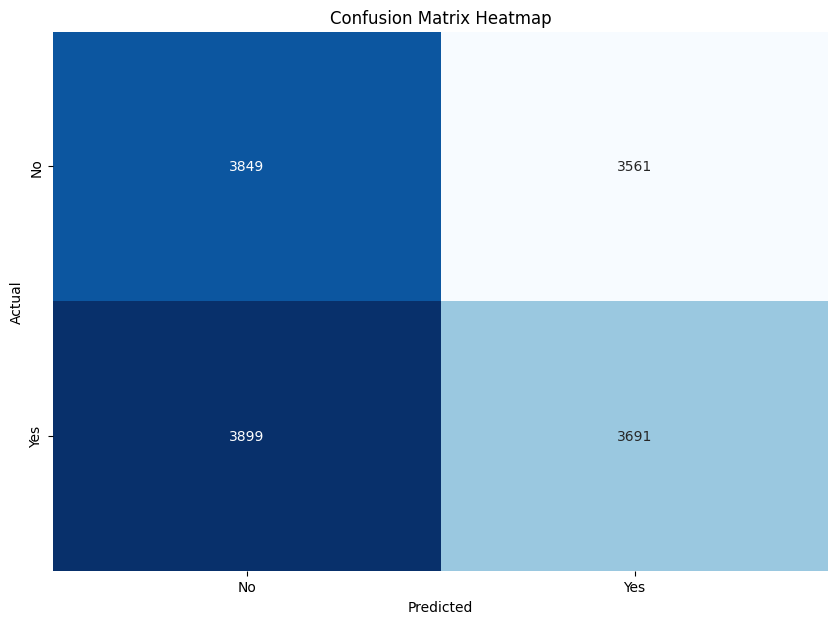

In [61]:
class_labels = ['No', 'Yes']
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()